<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/%5B03%5D_Logistic_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=vo_fUOk-IKk&list=PLWKjhJtqVAbm3T2Eq1_KgloC7ogdXxdRa

# 03 Logistic Regression with PyTorch (TERMINAR)

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
train_dataset = MNIST(root='./', train=True, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4909565.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 158697.28it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1494730.95it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8856591.71it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [ ]:
len(train_dataset)

60000

In [ ]:
# Download training dataset
test_dataset = MNIST(root='./', train=False, download=True)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test

In [ ]:
len(test_dataset)

10000

In [ ]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

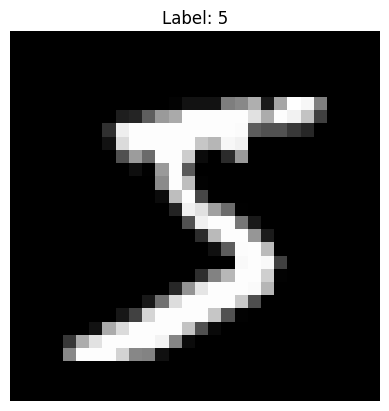

In [ ]:
img, label = train_dataset[0]
plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis(False)

In [ ]:
import torchvision.transforms as transform

In [ ]:
# MNIST dataset (images and labels)
train_dataset = MNIST(root='./', train=True, transform=transform.ToTensor())

In [ ]:
img, label = train_dataset[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [ ]:
28*28*5

3920

In [ ]:
print(img[:,10:15,10:15])
print(torch.max(img), torch.min(img))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


(-0.5, 4.5, 4.5, -0.5)

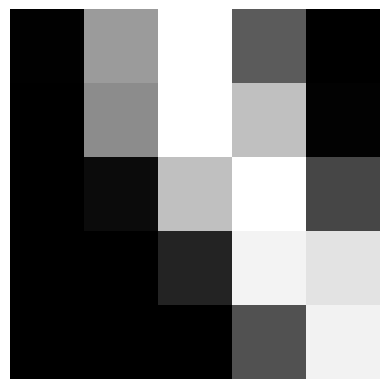

In [ ]:
plt.imshow(img[0,10:15,10:15],cmap='gray')
plt.axis(False)

## 3.1 Training and validation datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set:** Used to train the model, i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Valdation set:** Used to evaluate the model while training, adjust hyperparameters (leraning rate, etc.) and pick the best version of the model.
3. **Test set:** Used to compare different models, or different types of medelling approaches, and report the final accuracy of the model.

We can divide using `random_split` method in PyTorch.

In [ ]:
from torch.utils.data import random_split

In [ ]:
train_dataset, validation_dataset = random_split(dataset=train_dataset, lengths= [50_000,10_000])
len(train_dataset), len(validation_dataset)

(50000, 10000)

In [ ]:
# Create DataLoader usint batches
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset=validation_dataset,batch_size=batch_size)

## 3.2 Model

- Since `nn.Linear` expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(in_features = input_size, out_features = num_classes)

In [ ]:
model.weight.shape, model.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [ ]:
for imgs, labels in train_dataloader:
  print(labels)
  print(imgs.shape)
  outputs = model(imgs)

tensor([6, 8, 9, 6, 2, 7, 9, 7, 0, 4, 2, 8, 6, 4, 8, 0, 9, 5, 1, 2, 7, 7, 0, 0,
        5, 8, 3, 3, 2, 6, 9, 4, 7, 6, 0, 3, 7, 5, 4, 9, 0, 1, 8, 3, 7, 5, 9, 2,
        2, 9, 3, 9, 9, 5, 4, 2, 6, 5, 3, 2, 2, 6, 7, 9, 9, 6, 2, 6, 0, 8, 0, 8,
        1, 8, 9, 6, 9, 9, 5, 1, 2, 7, 5, 2, 0, 3, 9, 9, 7, 6, 4, 8, 0, 3, 7, 5,
        8, 0, 7, 7, 3, 9, 0, 8, 4, 8, 4, 2, 8, 3, 3, 0, 7, 4, 2, 2, 3, 9, 7, 9,
        1, 7, 7, 9, 9, 8, 7, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [ ]:
class MNISTModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = input_size, out_features = num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

model_v1 = MNISTModelV1()
model_v1

MNISTModelV1(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
list(model_v1.parameters())

[Parameter containing:
 tensor([[-0.0202, -0.0267,  0.0265,  ..., -0.0109,  0.0169, -0.0001],
         [ 0.0178, -0.0002, -0.0117,  ...,  0.0253, -0.0178,  0.0301],
         [ 0.0207, -0.0250,  0.0121,  ...,  0.0328,  0.0108,  0.0323],
         ...,
         [-0.0339, -0.0189,  0.0164,  ..., -0.0232, -0.0289, -0.0021],
         [ 0.0023,  0.0068,  0.0157,  ...,  0.0144,  0.0167,  0.0058],
         [-0.0054,  0.0141,  0.0014,  ..., -0.0307, -0.0017,  0.0263]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0321, -0.0130, -0.0211,  0.0242, -0.0194, -0.0256, -0.0022, -0.0030,
         -0.0304, -0.0201], requires_grad=True)]

In [ ]:
for img, labels in train_dataloader:
  print(f'Image shape: {img.shape}')
  outputs = model_v1(img)

print(f'Output shape: {outputs.shape}')
print(f'Sample outputs: \n {outputs[:2].data}')

Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 2

In [ ]:
import torch.nn.functional as F

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print(f"Sample probabilities:\n {probs[:2].data}")

# Add up the probabilities of an output row
print(f"Sum: {torch.sum(probs[0]).item()}")

Sample probabilities:
 tensor([[0.1405, 0.0946, 0.1086, 0.0967, 0.0986, 0.0731, 0.1378, 0.0635, 0.0808,
         0.1059],
        [0.1019, 0.0963, 0.0757, 0.0963, 0.0909, 0.1102, 0.1176, 0.0980, 0.1039,
         0.1091]])
Sum: 1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
preds, max_probs

(tensor([0, 6, 9, 4, 9, 1, 7, 9, 2, 0, 0, 6, 3, 2, 6, 4, 0, 6, 4, 9, 3, 6, 0, 9,
         0, 6, 9, 0, 6, 6, 4, 6, 9, 6, 7, 6, 6, 9, 0, 2, 6, 5, 6, 6, 4, 6, 0, 6,
         4, 4, 6, 6, 9, 6, 4, 6, 0, 6, 0, 9, 9, 9, 0, 2, 2, 6, 6, 8, 2, 0, 6, 6,
         9, 0, 5, 9, 0, 2, 0, 0]),
 tensor([0.1405, 0.1176, 0.1276, 0.1142, 0.1265, 0.1128, 0.1178, 0.1532, 0.1212,
         0.1180, 0.1409, 0.1277, 0.1300, 0.1197, 0.1217, 0.1208, 0.1356, 0.1236,
         0.1181, 0.1205, 0.1256, 0.1172, 0.1247, 0.1226, 0.1566, 0.1289, 0.1387,
         0.1272, 0.1359, 0.1207, 0.1227, 0.1187, 0.1285, 0.1233, 0.1178, 0.1246,
         0.1234, 0.1243, 0.1300, 0.1514, 0.1229, 0.1181, 0.1357, 0.1466, 0.1221,
         0.1411, 0.1297, 0.1254, 0.1208, 0.1272, 0.1396, 0.1205, 0.1572, 0.1389,
         0.1282, 0.1411, 0.1369, 0.1209, 0.1360, 0.1483, 0.1159, 0.1290, 0.1302,
         0.1112, 0.1323, 0.1233, 0.1230, 0.1267, 0.1128, 0.1151, 0.1165, 0.1291,
         0.1208, 0.1480, 0.1230, 0.1197, 0.1349, 0.1183, 0.1631, 0.1317],


## 3.3 Evaluation metrics and loss function

In [ ]:
def accuracy(outputs, labels):
  _ , preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1000)

In [ ]:
# Use cross-entropy
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
loss

tensor(2.2957, grad_fn=<NllLossBackward0>)

## 3.4 Training the model

The pseudocode of this process is:

```
for epoch in range(num_epochs):
  # Training phase
  for batch in train_dataloader:
    # Generate predictions
    # Calculate loss
    # Compute gradients
    # Update weights
    # Reset gradients

  # Validation phase
  for batch in val_dataloader:
    # Generate predictions
    # Calculate loss
    # Calculate metrics (accuracy etc.)

  # Calculate average validation loss & metrics

  # Log epochs, loss & metrics for inspection
```

In [ ]:
class MNISTModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = input_size, out_features = num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

  def training_step(self, batch):
    imgs, labels = batch
    out = self(imgs)                    # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    return loss

  def validation_step(self, batch):
    imgs, labels = batch
    out = self(imgs)                    # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    acc = accuracy(out, labels)         # Calculate accuracy
    return {'val_loss':loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()    # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}


model_v2 = MNISTModelV2()
model_v2

MNISTModelV2(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Now we'll define an `evaluate` function, which will perform the validation phase, and a `fit` function which will perform the entire training preocess.

In [ ]:
from tqdm.auto import tqdm

def evaluate(model, val_dataloader):
  outputs = [model.validation_step(batch) for batch in val_dataloader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_dataloader, val_dataloader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in tqdm(range(epochs)):
    # Training phase
    for batch in train_dataloader:
      loss.model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #Validation phase
    result = evaluate(model, val_dataloader)
    model.epoch_end(epoch,result)
    history.append(result)

  return history

In [ ]:
result_0 = model(model, val_dataloader)
result_0

TypeError: Linear.forward() takes 2 positional arguments but 3 were given

In [ ]:
histoy_1 = fit(epochs=5, lr=0.01, model=model, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'model'

In [ ]:
history_2 = fit(5, 0.001, model, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'model'

In [ ]:
history_3 = fit(5, 0.001, model, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'model'

In [ ]:
history_4 = fit(5, 0.001, model, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'model'

In [ ]:
history = [result_0] + history_1 + history_2 + history_3 + history_4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

NameError: name 'result_0' is not defined